# Stock Price Prediction case Study

**`Problem Statement 1:`**Predicting future stock prices based on historical data using a neural network. You can use a publicly available dataset like the Yahoo Finance dataset or any other stock market dataset of a company for the past 5 years. Your goal is to build a model that predicts the next day's closing price based on the previous 60 days of data.

`Approach:`Here I am considering the dataset **Yahoo Finance dataset** for company **Asian Paints Limited**for predicting stock price for the next day cloasing.

To solve these problem we can have following steps in our case study:
1. Data Gathering
2. Data Preprocessing
3. Model selection
4. Model Training
5. Stock price prediction

In [4]:
# Required installations
# !pip install yfinance
# !pip install tensorflow

In [6]:
# Basic imports for data processing 
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Step 1 : Data Gathering

Here we are gathering the data for the company Asian Paints Ltd. for Last 5 years 

In [9]:
stock_symbol = 'ASIANPAINT.NS'
data = yf.download(stock_symbol, start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


# Step 2 : Data Preprocessing

In [11]:
# Using close price parameter for making predictions
closing_price = data['Close'].values.reshape(-1, 1)

In [12]:
# Data Normalization with min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price)

In [13]:
# Creating sequenses for 60 days 
sequence_length = 60
x_data = []
y_data = []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

In [14]:
# Converting data to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

In [15]:
# Data Reshape
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [16]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Step 3 : Model Selection

Here I have chosen LSTM model for stock price prediction.

`Reason for Selection:` We have multiple option available for predicting stock prices as below:
1. ARIMA
2. Holt-Winters
3. Linear Regression
4. SVR
5. RNN
6. LSTM
7. GRU etc.

We have chosen **LSTM** because 
1. It performs better on Financial Time Series.
2. It can learn and handle Long Term dependencies.
3. Non Linearity can be easily handeled.


In [19]:
# Building LSTM 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 4 : Model Training 

I am using **adam** optimizer and **mean_squared_error** as loss functions. The resons are:

`adam`: As it has adaptive learning rate and roburst performance for regression problems.

`mean_squared_error`: It is widely used for regression problems for prediction of continuous values.

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0828 - val_loss: 0.0051
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0

In [23]:
# Step 5 : Stock Price Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


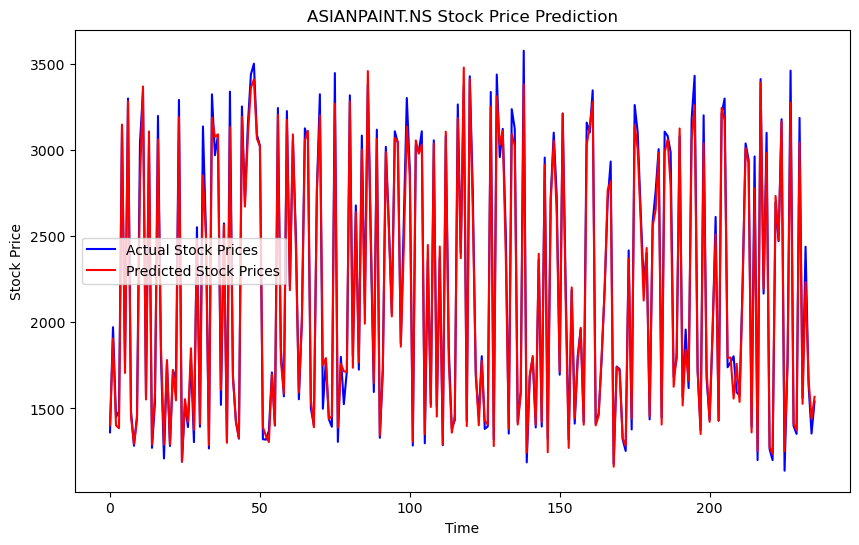

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Stock Prices')
plt.plot(predictions, color='red', label='Predicted Stock Prices')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()